<a href="https://colab.research.google.com/github/TuncerCemUgurluer/EEG_deception_detection/blob/code/EEG_Signal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
eeg_channels = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2',
                'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']

In [ ]:
baseline_df=pd.read_csv("/content/drive/MyDrive/EEG/Serkan_new/Serkan_new_baseline/Serkan_new_baseline.csv")[eeg_channels]
true_df=pd.read_csv("/content/drive/MyDrive/EEG/Serkan_new/Serkan_new_True/Serkan_new_true1.csv")[eeg_channels]
lie_df=pd.read_csv("/content/drive/MyDrive/EEG/Serkan_new/Serkan_new_Lie/Serkan_new_lie10.csv")[eeg_channels]

<Axes: >

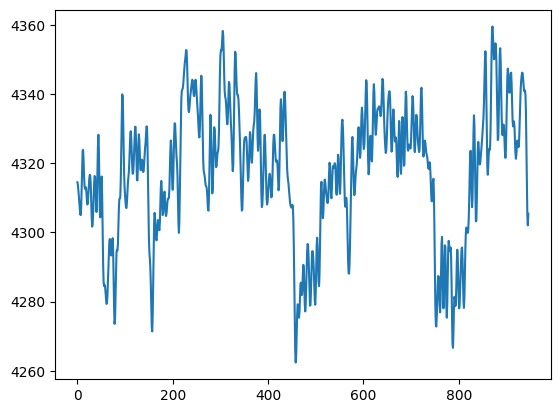

In [ ]:
lie_df["EEG.AF3"].plot()

In [ ]:
baseline_eeg = baseline_df[eeg_channels]
true_eeg = true_df[eeg_channels]
lie_eeg = lie_df[eeg_channels]

In [ ]:
baseline_mean = baseline_eeg.mean()
baseline_std = baseline_eeg.std()

true_mean = true_eeg.mean()
true_std = true_eeg.std()

lie_mean = lie_eeg.mean()
lie_std = lie_eeg.std()

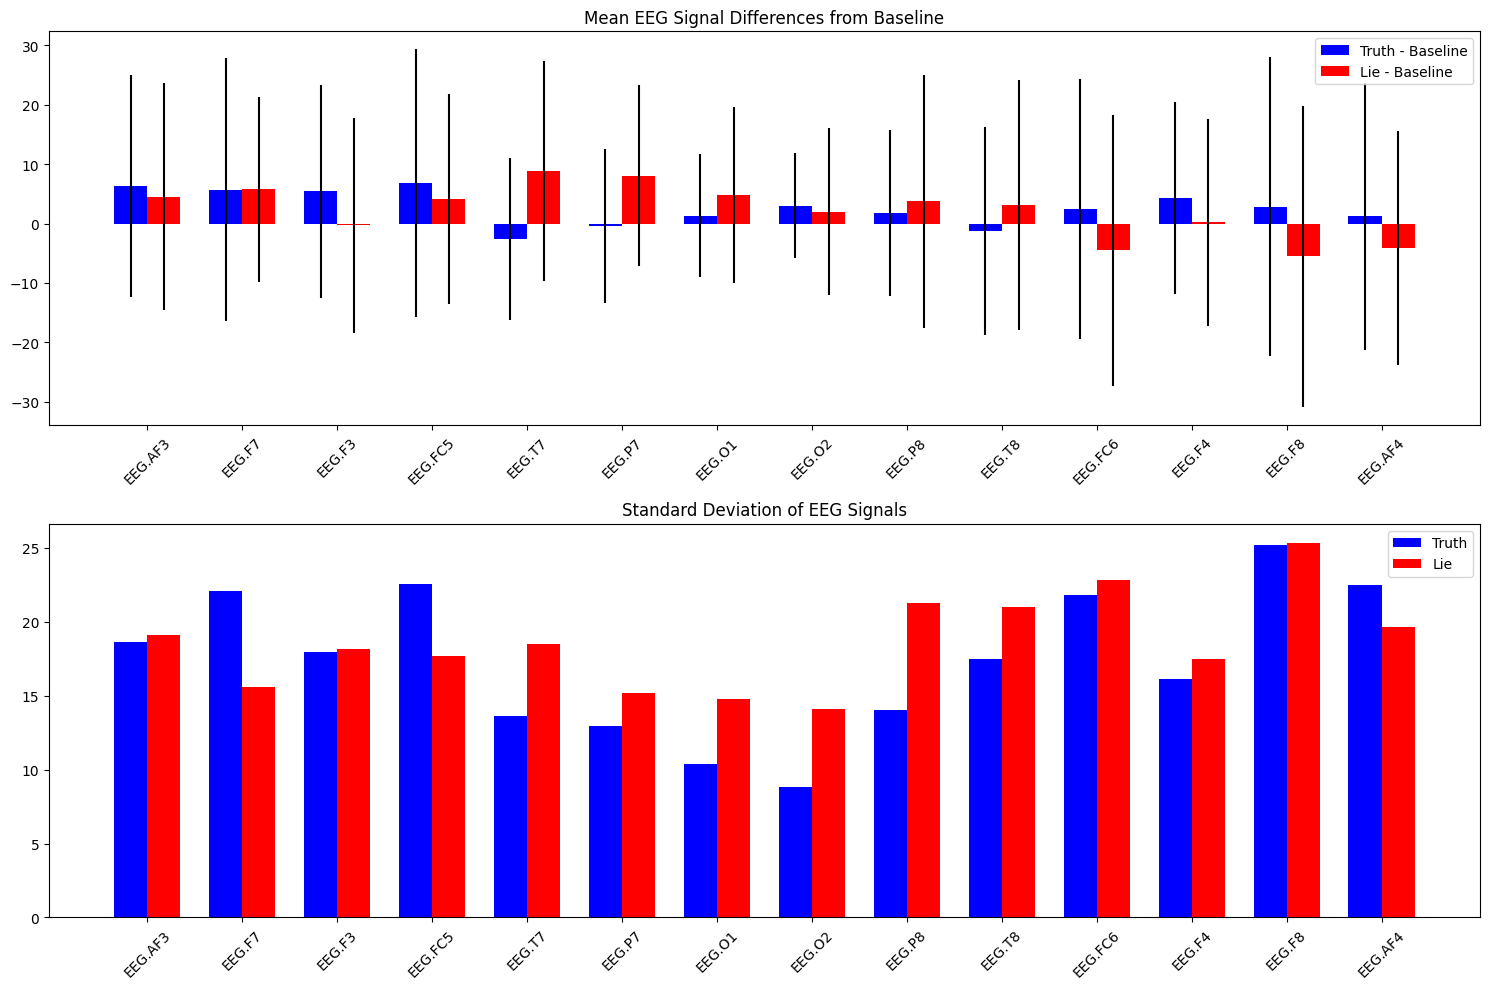

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
width = 0.35
index = np.arange(len(eeg_channels))

# Mean plot
axes[0].bar(index, true_mean - baseline_mean, width, label='Truth - Baseline', color='blue', yerr=true_std)
axes[0].bar(index + width, lie_mean - baseline_mean, width, label='Lie - Baseline', color='red', yerr=lie_std)
axes[0].set_title('Mean EEG Signal Differences from Baseline')
axes[0].set_xticks(index + width / 2)
axes[0].set_xticklabels(eeg_channels, rotation=45)
axes[0].legend()

# Standard deviation plot
axes[1].bar(index, true_std, width, label='Truth', color='blue')
axes[1].bar(index + width, lie_std, width, label='Lie', color='red')
axes[1].set_title('Standard Deviation of EEG Signals')
axes[1].set_xticks(index + width / 2)
axes[1].set_xticklabels(eeg_channels, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
from scipy.signal import welch, stft
import pywt

In [ ]:
def plot_frequency_analyses(signal_true, signal_lie, channel_name, fs=128):
    """Compute and plot PSD, STFT, FT, and Wavelet for the given signals."""
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

    # Compute and Plot PSD
    freqs_true, psd_true = welch(signal_true, fs=fs)
    freqs_lie, psd_lie = welch(signal_lie, fs=fs)
    axes[0, 0].plot(freqs_true, psd_true, label='Truth')
    axes[0, 0].plot(freqs_lie, psd_lie, label='Lie', linestyle='--')
    axes[0, 0].set_title('Power Spectral Density (PSD)')
    axes[0, 0].set_xlabel('Frequency (Hz)')
    axes[0, 0].set_ylabel('Power/Frequency (dB/Hz)')
    axes[0, 0].legend()

    # Compute and Plot STFT
    _, _, Z_true = stft(signal_true, fs=fs, nperseg=256)
    _, _, Z_lie = stft(signal_lie, fs=fs, nperseg=256)
    axes[0, 1].pcolormesh(np.abs(Z_true), shading='gouraud')
    axes[0, 1].set_title('STFT Truth')
    axes[0, 1].set_ylabel('Frequency (Hz)')
    axes[0, 1].set_xlabel('Time (s)')

    axes[1, 1].pcolormesh(np.abs(Z_lie), shading='gouraud')
    axes[1, 1].set_title('STFT Lie')
    axes[1, 1].set_ylabel('Frequency (Hz)')
    axes[1, 1].set_xlabel('Time (s)')

    # Compute and Plot Fourier Transform
    ft_true = np.abs(np.fft.fft(signal_true))
    ft_lie = np.abs(np.fft.fft(signal_lie))
    freqs = np.fft.fftfreq(len(signal_true), 1/fs)
    axes[0, 2].plot(freqs, ft_true, label='Truth')
    axes[0, 2].plot(freqs, ft_lie, label='Lie', linestyle='--')
    axes[0, 2].set_title('Fourier Transform')
    axes[0, 2].set_xlabel('Frequency (Hz)')
    axes[0, 2].set_ylabel('Amplitude')
    axes[0, 2].legend()

    # Compute and Plot Wavelet Transform
    coeffs_true, freqs_true = pywt.cwt(signal_true, scales=np.arange(1, 128), wavelet='cmor', sampling_period=1/fs)
    coeffs_lie, freqs_lie = pywt.cwt(signal_lie, scales=np.arange(1, 128), wavelet='cmor', sampling_period=1/fs)
    axes[0, 3].imshow(np.abs(coeffs_true), aspect='auto', extent=[0, len(signal_true)/fs, freqs_true[0], freqs_true[-1]])
    axes[0, 3].set_title('Wavelet Transform Truth')
    axes[0, 3].set_ylabel('Frequency (Hz)')
    axes[0, 3].set_xlabel('Time (s)')

    axes[1, 3].imshow(np.abs(coeffs_lie), aspect='auto', extent=[0, len(signal_lie)/fs, freqs_lie[0], freqs_lie[-1]])
    axes[1, 3].set_title('Wavelet Transform Lie')
    axes[1, 3].set_ylabel('Frequency (Hz)')
    axes[1, 3].set_xlabel('Time (s)')

    fig.suptitle(f"Frequency Analyses for {channel_name} Channel")
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

In [ ]:
max_len = min(len(true_eeg['EEG.F3']), len(lie_eeg['EEG.F3']))

true_signal = true_eeg['EEG.F3'].iloc[:max_len].to_numpy()
lie_signal = lie_eeg['EEG.F3'].iloc[:max_len].to_numpy()

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


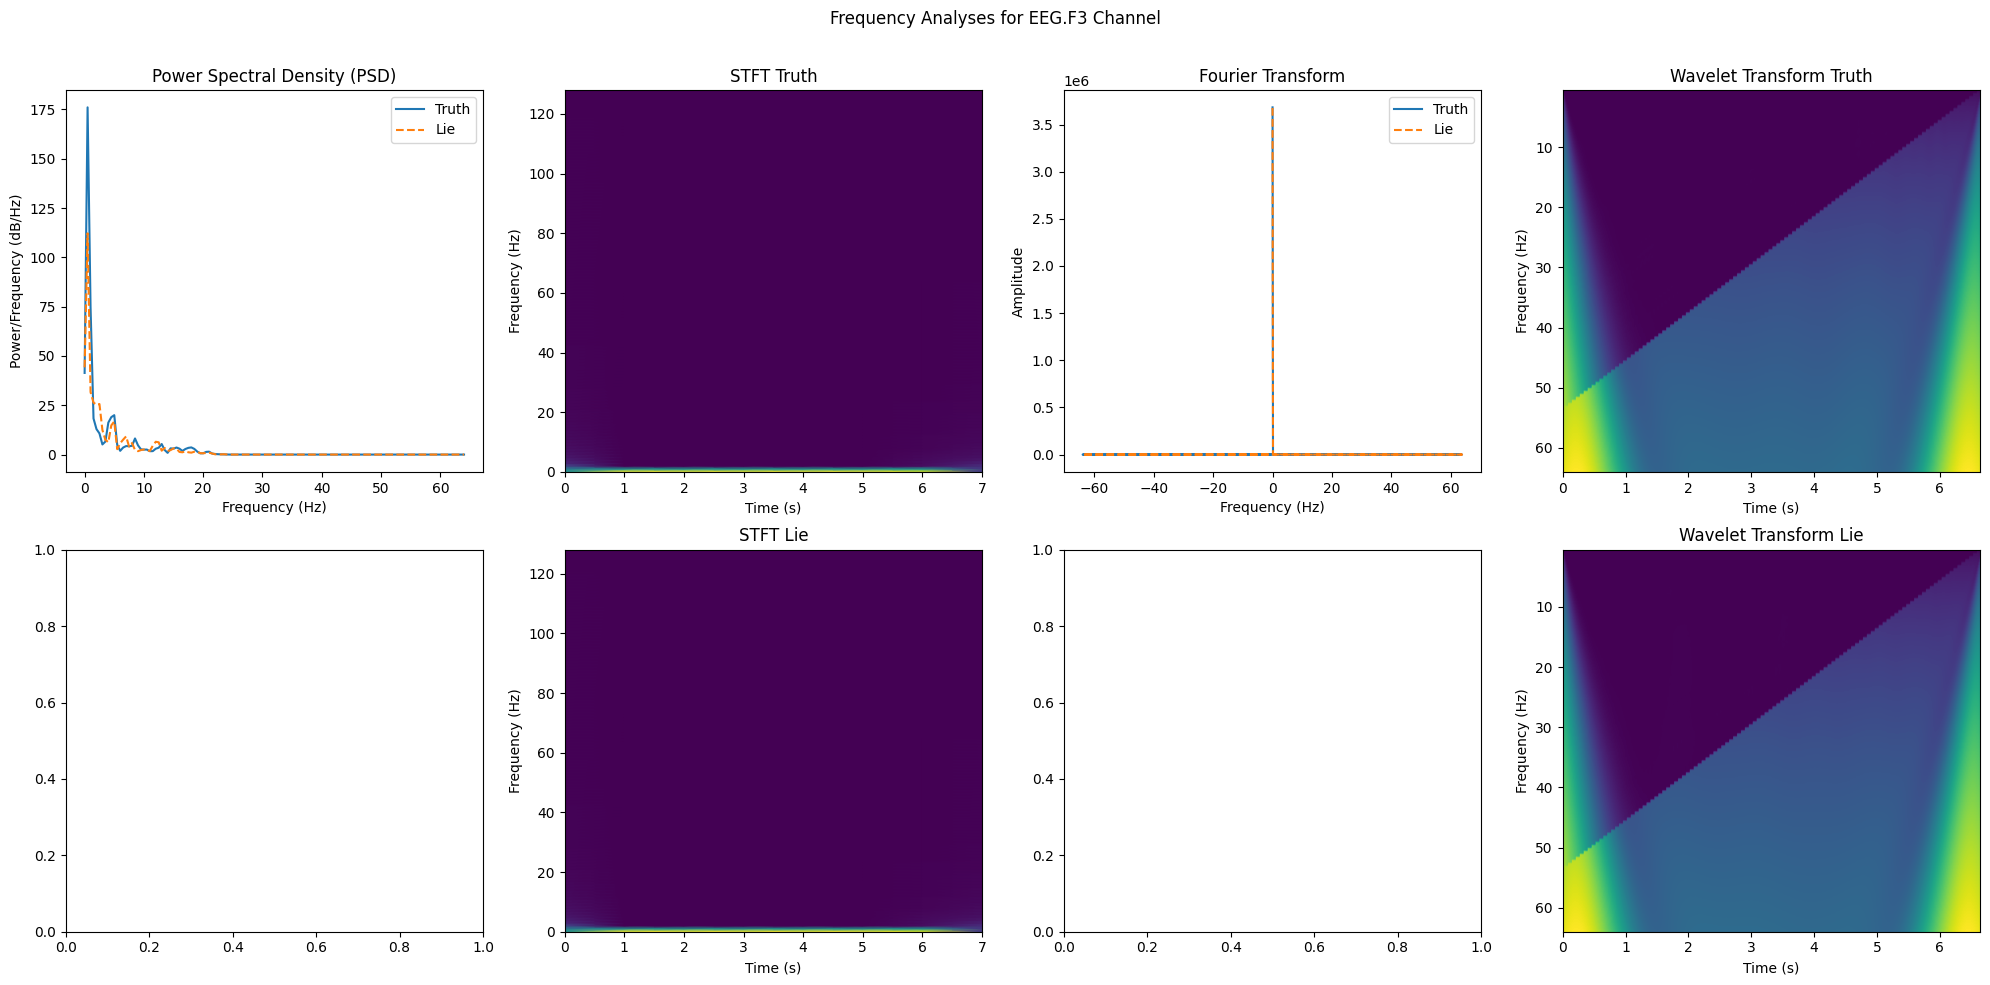

In [ ]:
plot_frequency_analyses(true_signal, lie_signal, 'EEG.F3')

In [ ]:
def sample_entropy(U, m, r):

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))


In [ ]:
# Compute sample entropy for 'EEG.F3' channel for both Truth and Lie states
m, r = 2, 0.2 * np.std(true_signal)  # Parameters for sample entropy
sampen_true = sample_entropy(true_signal, m, r)
sampen_lie = sample_entropy(lie_signal, m, r)

sampen_true, sampen_lie

(0.6562955665916954, 0.6294355680474529)

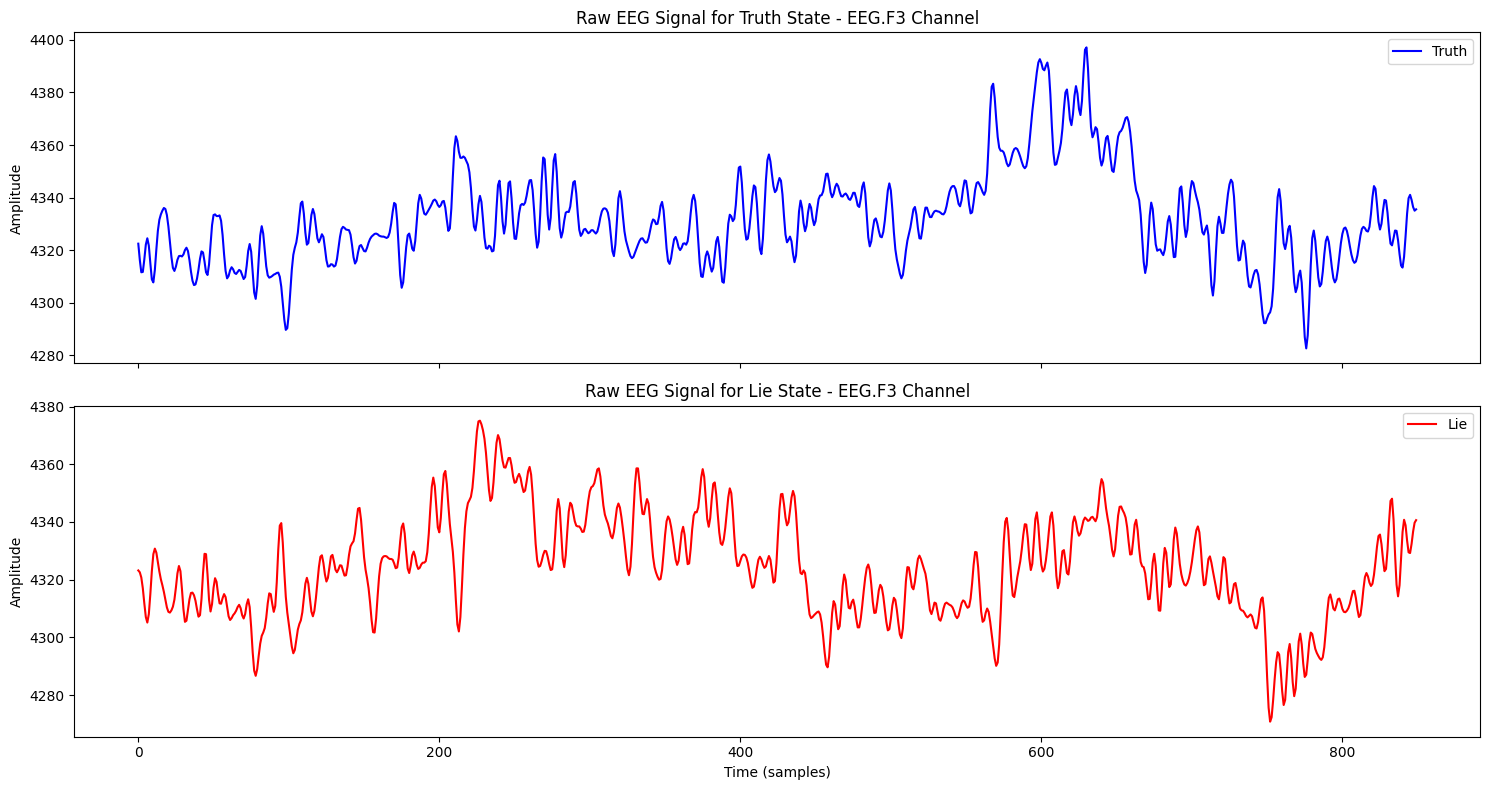

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), sharex=True)

# Plotting Truth state
axes[0].plot(true_signal, color='blue', label='Truth')
axes[0].set_title('Raw EEG Signal for Truth State - EEG.F3 Channel')
axes[0].set_ylabel('Amplitude')
axes[0].legend()

# Plotting Lie state
axes[1].plot(lie_signal, color='red', label='Lie')
axes[1].set_title('Raw EEG Signal for Lie State - EEG.F3 Channel')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlabel('Time (samples)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
fs = 256  # Sample rate
time_array = np.arange(0, max_len / fs, 1/fs)

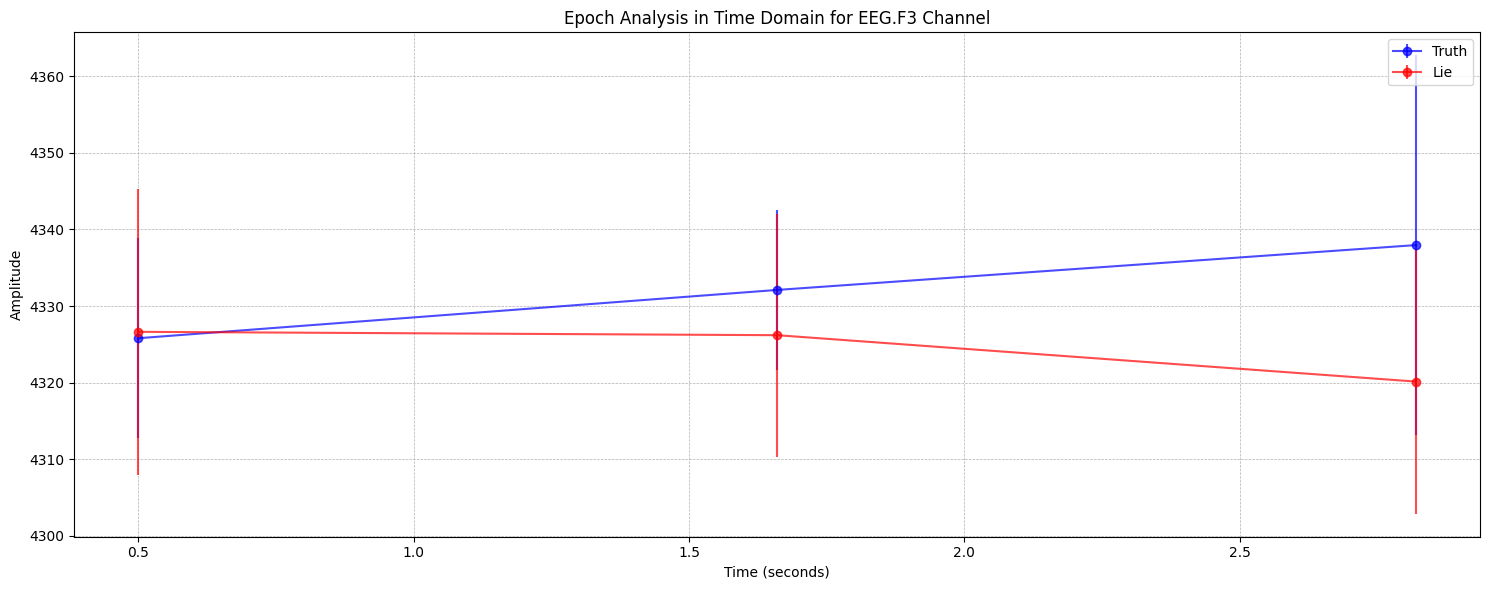

In [ ]:
def epoch_time_domain_analysis(signal_true, signal_lie, epoch_length, fs=256):
    """Perform epoch analysis in time domain and visualize the results."""
    num_epochs = len(signal_true) // epoch_length

    # Split the signals into epochs
    epochs_true = np.array_split(signal_true, num_epochs)
    epochs_lie = np.array_split(signal_lie, num_epochs)

    # Compute mean and standard deviation for each epoch
    means_true = [np.mean(epoch) for epoch in epochs_true]
    stds_true = [np.std(epoch) for epoch in epochs_true]

    means_lie = [np.mean(epoch) for epoch in epochs_lie]
    stds_lie = [np.std(epoch) for epoch in epochs_lie]

    # Plotting
    time_epochs = np.linspace(0.5, len(signal_true) / fs - 0.5, num_epochs)  # Center of each epoch in seconds

    fig, ax = plt.subplots(figsize=(15, 6))
    ax.errorbar(time_epochs, means_true, yerr=stds_true, fmt='-o', label='Truth', color='blue', alpha=0.7)
    ax.errorbar(time_epochs, means_lie, yerr=stds_lie, fmt='-o', label='Lie', color='red', alpha=0.7)
    ax.set_title('Epoch Analysis in Time Domain for EEG.F3 Channel')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')
    ax.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Perform epoch analysis in time domain for 'EEG.F3' channel
epoch_length = fs  # 1-second epochs
epoch_time_domain_analysis(true_signal, lie_signal, epoch_length)

Delta Band (1-4 Hz): There seems to be a slight difference in the delta band between the two states. Delta activity is often associated with deep sleep or unconscious processes.

Alpha Band (8-14 Hz): The alpha band, indicative of relaxed alertness, shows notable differences between the two states. This might suggest variations in relaxation or alertness levels during the two states.

Beta Band (14-30 Hz): Differences in the beta band could be indicative of variations in active, analytical thought or alertness between truth-telling and lying.

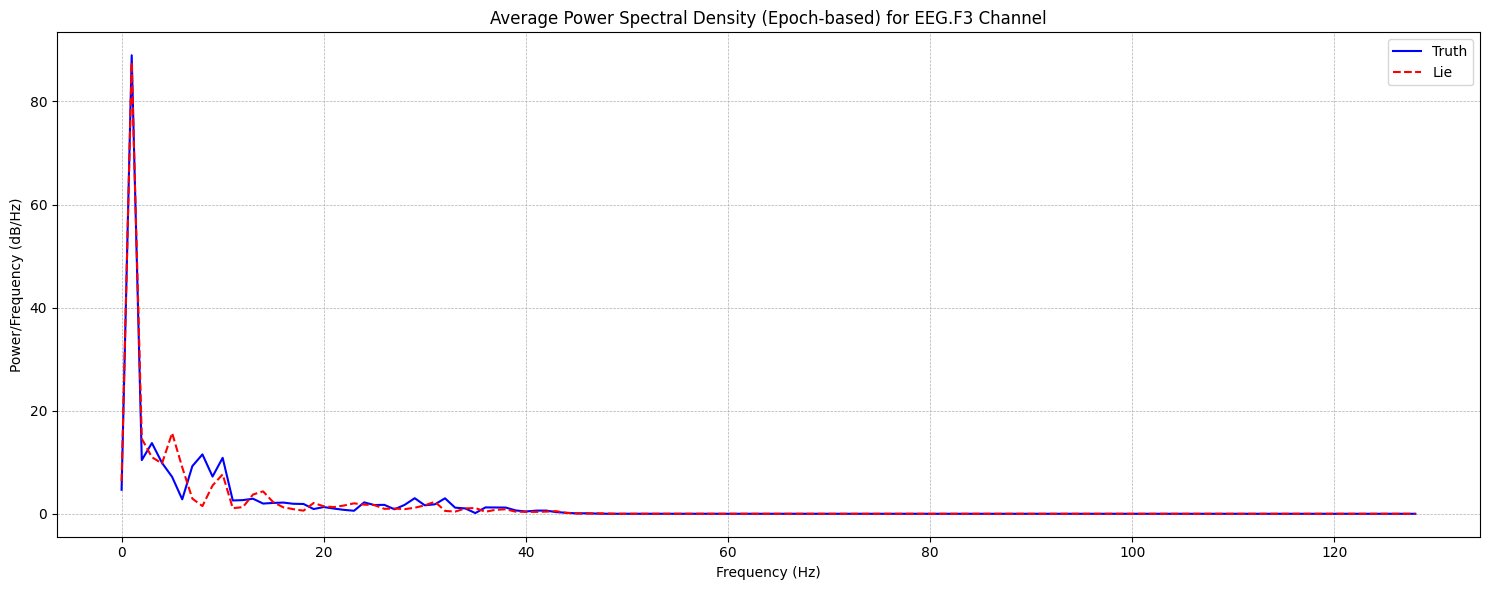

In [ ]:
def epoch_frequency_domain_analysis(signal_true, signal_lie, epoch_length, fs=256):
    """Perform epoch analysis in frequency domain and visualize the results."""
    num_epochs = len(signal_true) // epoch_length

    # Split the signals into epochs
    epochs_true = np.array_split(signal_true, num_epochs)
    epochs_lie = np.array_split(signal_lie, num_epochs)

    # Compute PSD for each epoch and average
    psds_true = [welch(epoch, fs=fs)[1] for epoch in epochs_true]
    psds_lie = [welch(epoch, fs=fs)[1] for epoch in epochs_lie]

    avg_psd_true = np.mean(psds_true, axis=0)
    avg_psd_lie = np.mean(psds_lie, axis=0)

    # Plotting
    freqs = welch(epochs_true[0], fs=fs)[0]  # Frequency bins

    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(freqs, avg_psd_true, label='Truth', color='blue')
    ax.plot(freqs, avg_psd_lie, label='Lie', color='red', linestyle='--')
    ax.set_title('Average Power Spectral Density (Epoch-based) for EEG.F3 Channel')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power/Frequency (dB/Hz)')
    ax.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Perform epoch analysis in frequency domain for 'EEG.F3' channel
epoch_frequency_domain_analysis(true_signal, lie_signal, epoch_length)

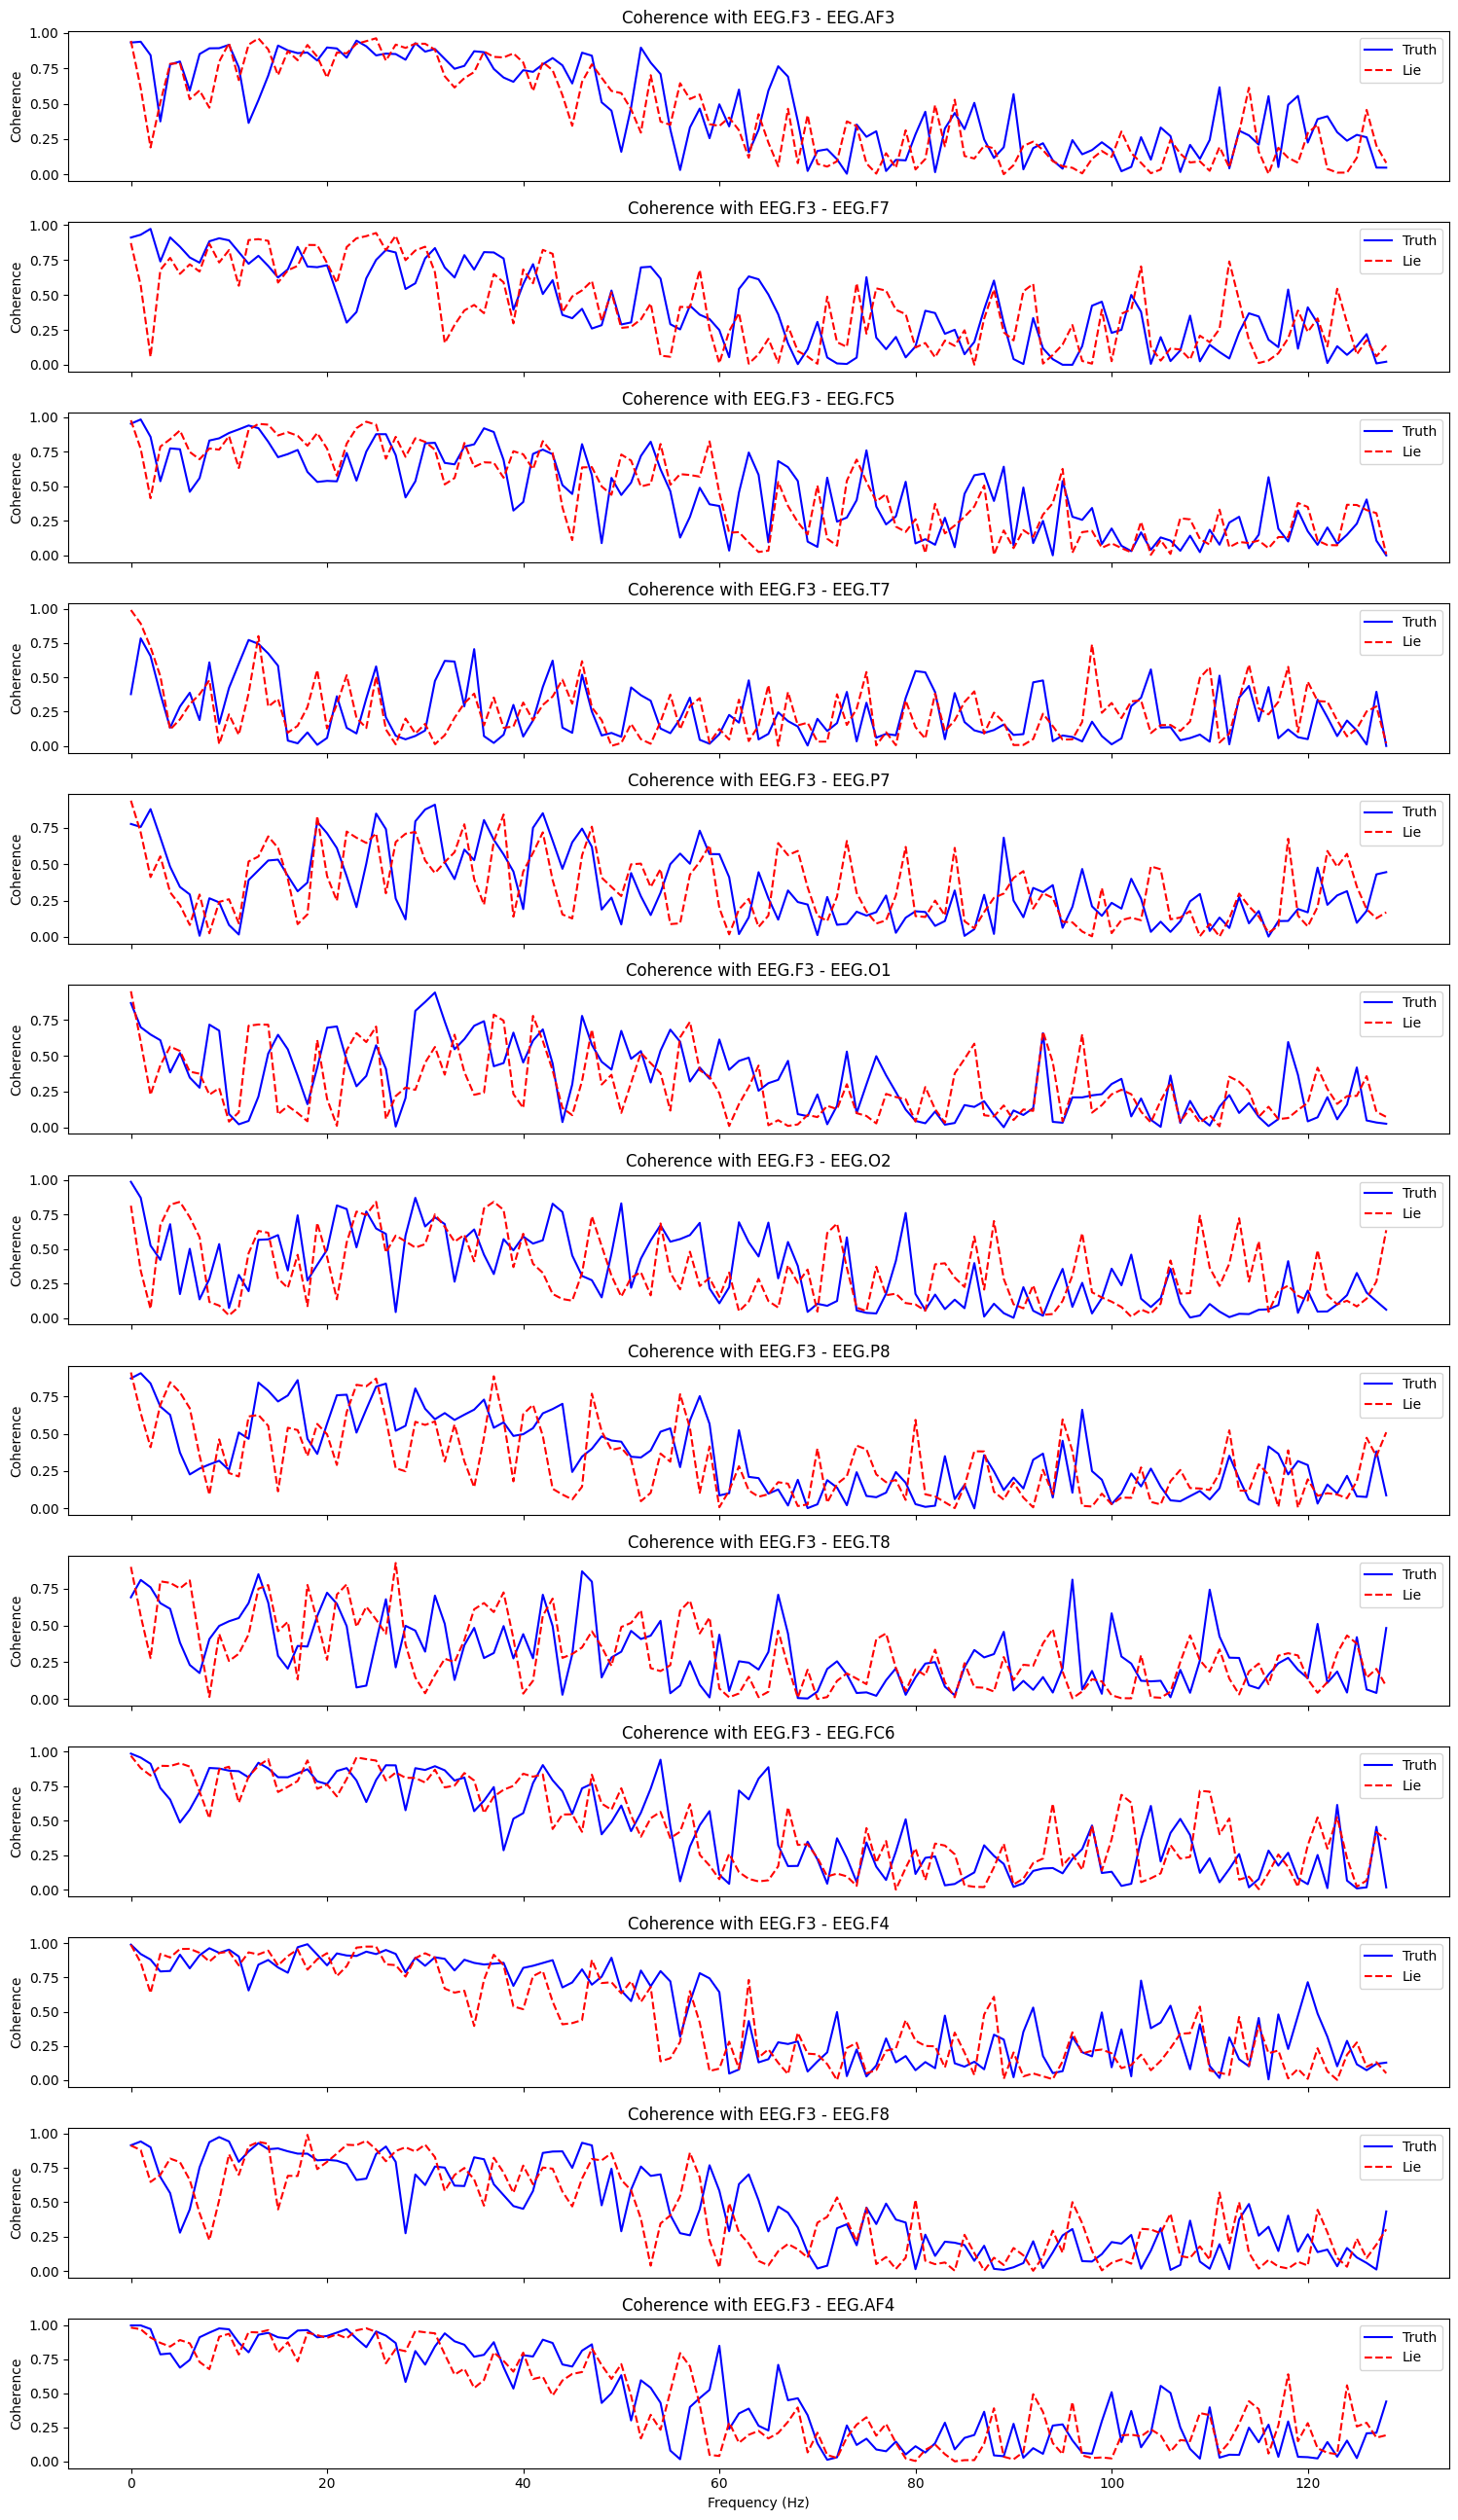

In [ ]:
from scipy.signal import coherence

# Define a function to compute and plot multichannel coherence
def plot_multichannel_coherence(ref_signal_true, ref_signal_lie, signals_true, signals_lie, channel_names, fs=256):
    """Compute and plot coherence with a reference signal for multiple channels."""
    fig, axes = plt.subplots(nrows=len(channel_names), ncols=1, figsize=(15, 2 * len(channel_names)), sharex=True)

    for idx, (signal_true, signal_lie, channel) in enumerate(zip(signals_true, signals_lie, channel_names)):
        # Compute coherence
        freqs, coh_true = coherence(ref_signal_true, signal_true, fs=fs, nperseg=256)
        _, coh_lie = coherence(ref_signal_lie, signal_lie, fs=fs, nperseg=256)

        # Plot
        axes[idx].plot(freqs, coh_true, label='Truth', color='blue')
        axes[idx].plot(freqs, coh_lie, label='Lie', color='red', linestyle='--')
        axes[idx].set_title(f'Coherence with EEG.F3 - {channel}')
        axes[idx].set_ylabel('Coherence')
        axes[idx].legend()

    axes[-1].set_xlabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

# Exclude the reference channel 'EEG.F3' from the list
other_channels = [ch for ch in eeg_channels if ch != 'EEG.F3']

# Get signals for these channels
signals_true = [true_eeg[ch].iloc[:max_len].to_numpy() for ch in other_channels]
signals_lie = [lie_eeg[ch].iloc[:max_len].to_numpy() for ch in other_channels]

# Plot multichannel coherence with 'EEG.F3' as reference
plot_multichannel_coherence(true_signal, lie_signal, signals_true, signals_lie, other_channels)

In [ ]:
import matplotlib.colors as colors

In [ ]:
from scipy.signal import cwt, morlet

In [ ]:
segment_length=256*6

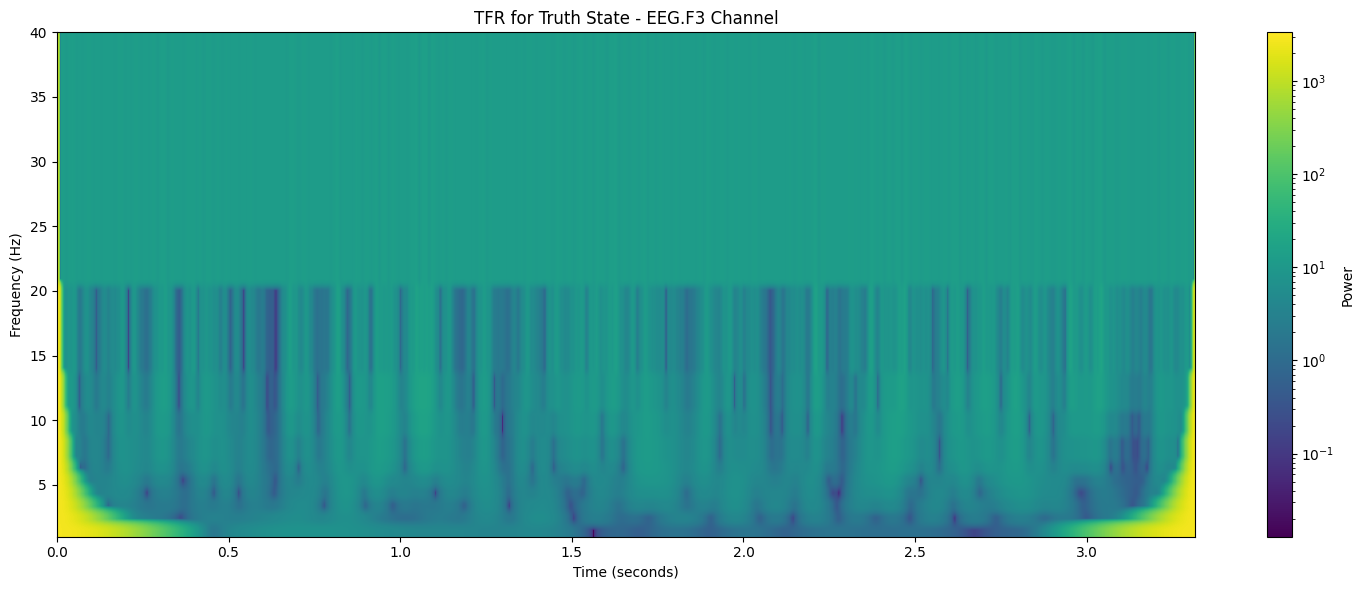

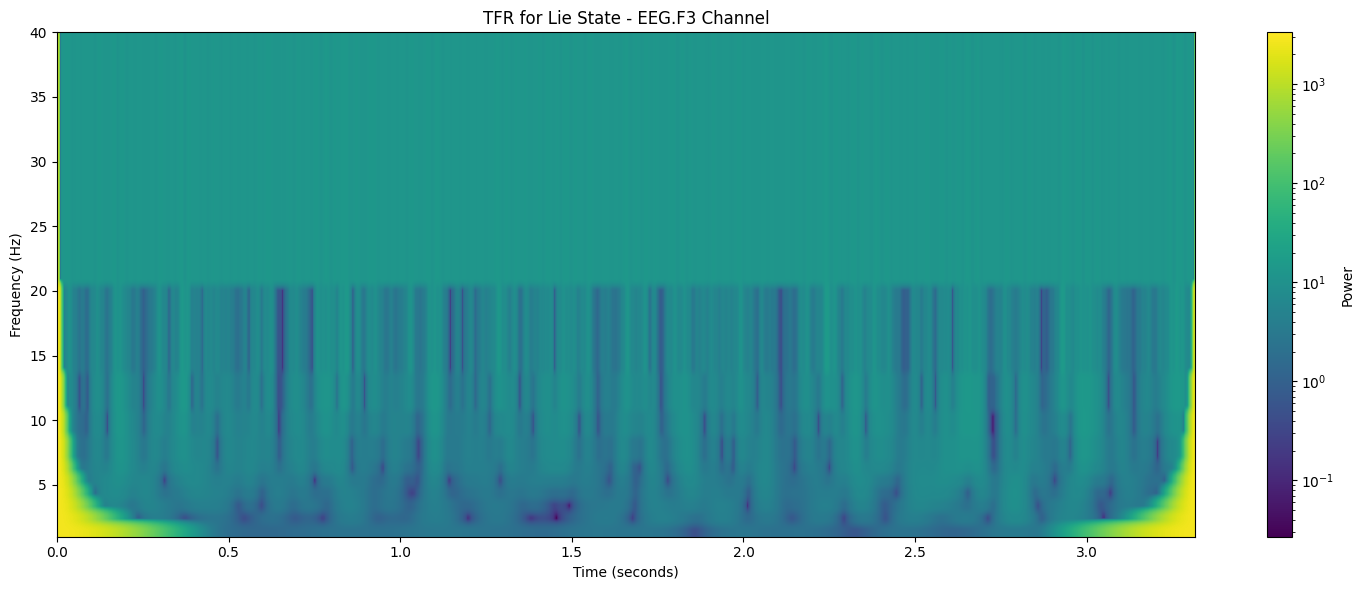

In [ ]:
def plot_tfr_wavelet(data, fs=256, title=""):
    """Compute and plot the time-frequency representation (TFR) using the Wavelet Transform."""
    # Define wavelet parameters
    frequencies = np.arange(1, 41, 1)  # Analyze frequencies from 1Hz to 40Hz
    widths = np.int64(fs / (2 * np.pi * frequencies))  # Ensure integer values

    # Compute wavelet transform
    tfr = cwt(data, wavelet=morlet, widths=widths)

    # Plot
    fig, ax = plt.subplots(figsize=(15, 6))
    t = np.linspace(0, len(data) / fs, len(data), endpoint=False)
    extent = [t.min(), t.max(), frequencies.min(), frequencies.max()]
    img = ax.imshow(np.abs(tfr), aspect='auto', extent=extent, origin='lower',
                    norm=colors.LogNorm(vmin=np.abs(tfr).min(), vmax=np.abs(tfr).max()))
    ax.set_title(title)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Frequency (Hz)')
    fig.colorbar(img, ax=ax, orientation='vertical', label='Power')
    plt.tight_layout()
    plt.show()

# Plot TFR for 'EEG.F3' channel for Truth state
plot_tfr_wavelet(true_signal[:segment_length], title="TFR for Truth State - EEG.F3 Channel")

# Plot TFR for 'EEG.F3' channel for Lie state
plot_tfr_wavelet(lie_signal[:segment_length], title="TFR for Lie State - EEG.F3 Channel")
